In [79]:
# Bibliotecas
# Manipulação de dados
import pandas as pd
import numpy as np
# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# SkLearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve

# Setando configurações de plot
import matplotlib.style as style
style.use('ggplot')

In [16]:
# Obtendo arquivo e gerando dataframe
df = pd.read_csv('Classified Data',index_col='Unnamed: 0')
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [17]:
# Infos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [18]:
# Estatistica Descritiva
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [19]:
# Verificando Nulls
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [20]:
# Pegando nomes das colunas
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [22]:
# Quantidade de colunas
len(df.columns)

11

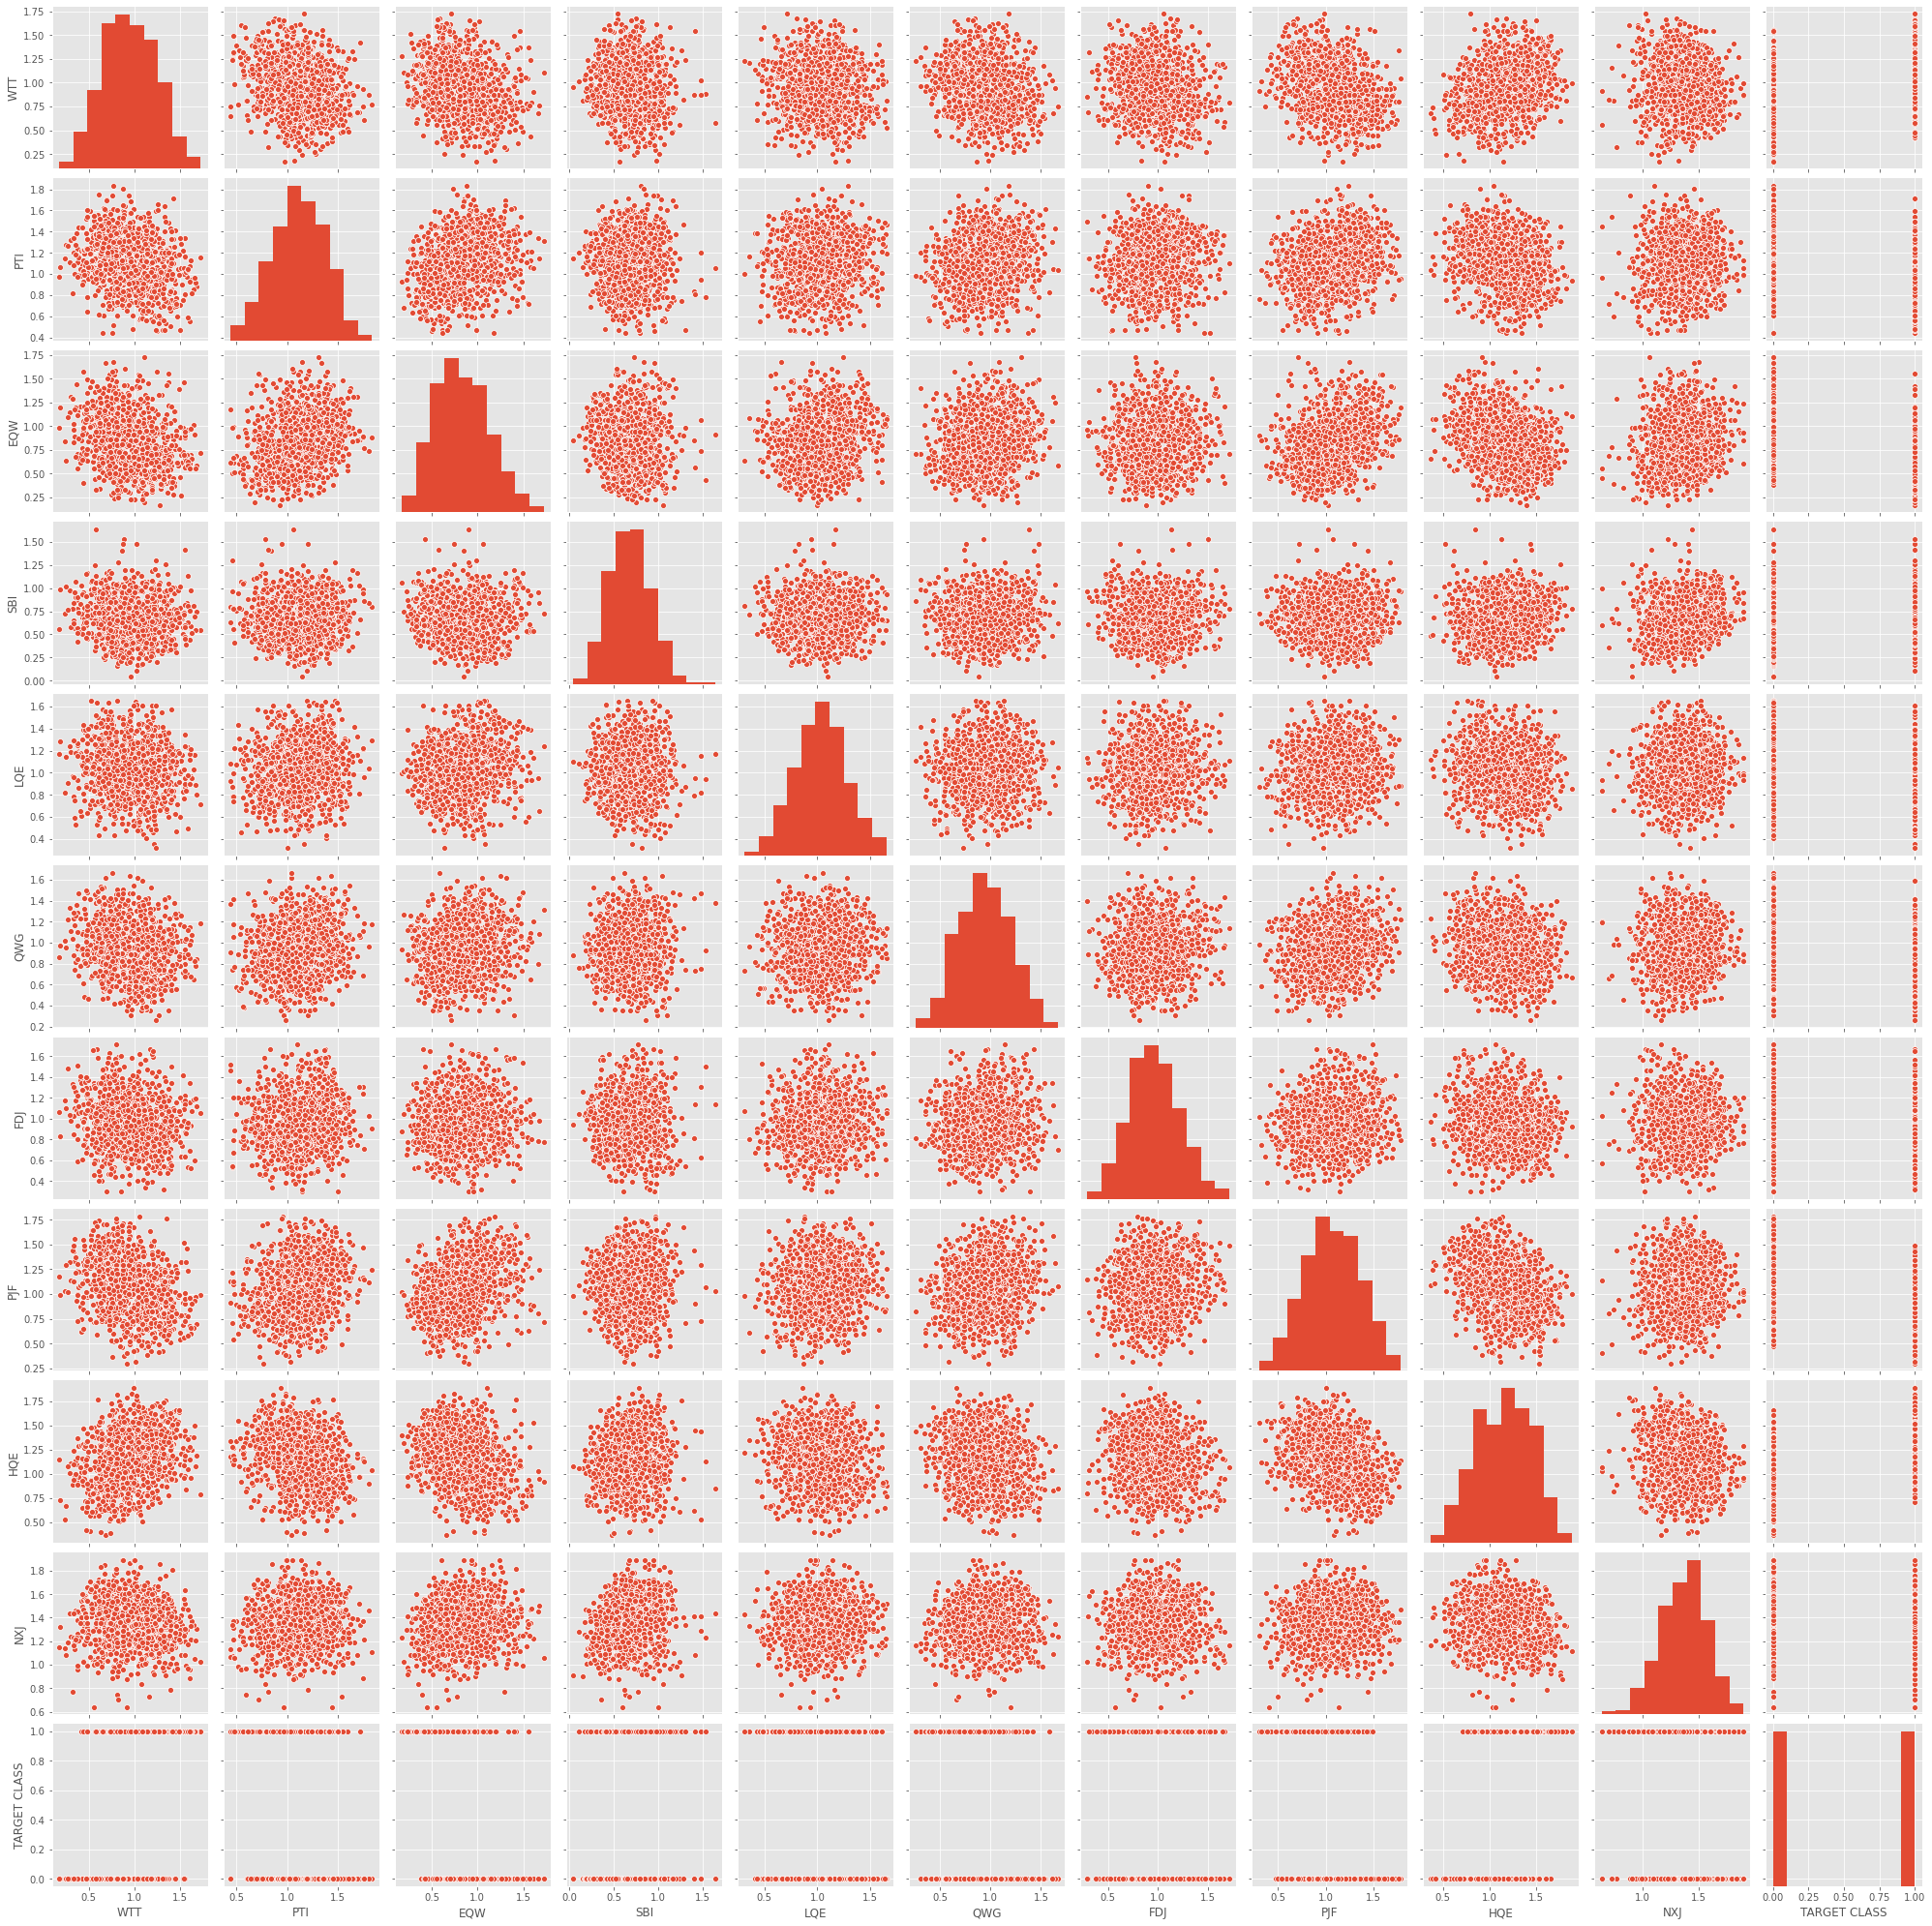

In [25]:
# Relação das váriaveis
sns.pairplot(df)
plt.show()

In [30]:
# Para KNN devemos normalizar para bom funcionamento do modelo

# Inicializando scaler
scaler = StandardScaler()

# Aplicando apenas nas entradas
X = scaler.fit_transform(df.iloc[:,:-1])
y = df['TARGET CLASS']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [88]:
# Testando um valor abritrario de K (o default=5)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9433333333333334

In [90]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       142
           1       0.95      0.94      0.95       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [92]:
print(confusion_matrix(y_test, y_pred))

[[135   7]
 [ 10 148]]


In [93]:
# Podemos melhorar o algoritmo "afinando" os hiperparametros
# Neste caso podemos buscar vários K e testá-los

In [86]:
# Vou testar vários K's de 1 a 50
n = 50
resultado_err = []
resultado = []
for k in range(1,n):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    resultado.append(knn.score(X_test, y_test))
    resultado_err.append(np.mean(prediction != y_test))

In [95]:
# Melhor resultado (em acurácia)
resultado.index(max(resultado))

11

Text(0.5, 1.0, 'Acurácia por K')

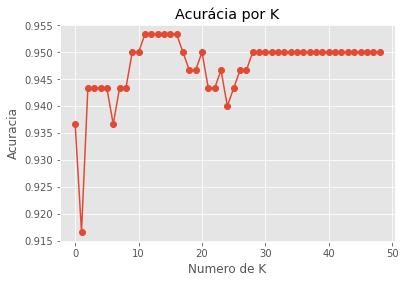

In [96]:
# Podemos ver visualmente
plt.plot(resultado, marker='o')
plt.xlabel('Numero de K')
plt.ylabel('Acuracia')
plt.title('Acurácia por K')

Text(0, 0.5, 'Erro')

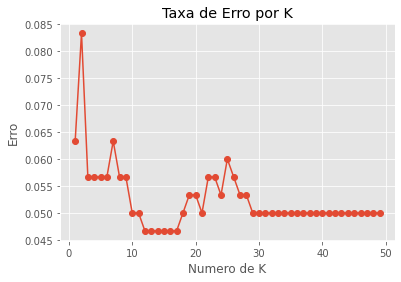

In [97]:
# Também pela taxa de erro
plt.plot(range(1,50), resultado_err, marker='o')
plt.title('Taxa de Erro por K')
plt.xlabel('Numero de K')
plt.ylabel('Erro')

In [98]:
# Escolhemos valor de K = 11
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [99]:
# Podemos observar uma leve diferença na precisão
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [83]:
# E também menos Falsos Negativos
print(confusion_matrix(y_test, y_pred))

[[135   7]
 [  8 150]]


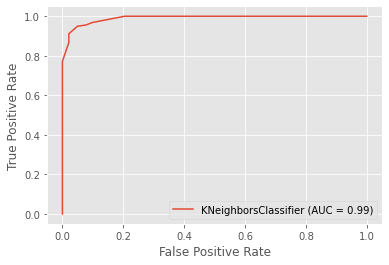

In [84]:
plot_roc_curve(knn, X_test, y_test)